In [1]:
import requests

import pandas as pd
import numpy as np
from scipy import stats

from src.utils import df_na_vals

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://500.farm/vastai-exporter/machines'

r = requests.get(url)
r.raise_for_status()

offers  = pd.DataFrame(r.json()["offers"])
offers['timestamp'] = pd.to_datetime(r.json()['timestamp'])
print(offers.timestamp[0])
offers

2023-09-02 17:57:51.978191294+00:00


,bw_nvlink,chunks,client_run_time,compute_cap,cpu_cores,cpu_name,cpu_ram,credit_balance,credit_discount,credit_discount_max,...,reliability2,score,start_date,static_ip,storage_cost,total_flops,verification,verified,vram_costperhour,timestamp
0,0.0,"[{'size': 1, 'offerId': 6883992, 'rentable': T...",1.1,860,16,Core™ i9-9900K,15902,None,None,0.4,...,0.599993,8.110876,1.693677e+09,True,0.15,19.783680,unverified,False,1.098633e-05,2023-09-02 17:57:51.978191294+00:00
1,0.0,"[{'size': 1, 'offerId': 6883537, 'rentable': F...",1.1,750,8,Core™ i7-9700K,23957,None,None,0.4,...,0.599993,14.563780,NaN,True,0.15,29.245440,unverified,False,4.438920e-06,2023-09-02 17:57:51.978191294+00:00
2,0.0,"[{'size': 1, 'offerId': 6883621, 'rentable': T...",1.1,860,40,Xeon® E5-2680 v2,64346,None,None,0.4,...,0.599993,9.579295,1.693677e+09,True,0.15,35.266560,unverified,False,8.382161e-06,2023-09-02 17:57:51.978191294+00:00
3,0.0,"[{'size': 1, 'offerId': 6883089, 'rentable': F...",1.1,860,8,Core™ i7-9700F,32001,None,None,0.4,...,0.599993,0.000000,NaN,False,0.15,19.783680,unverified,False,3.662109e-07,2023-09-02 17:57:51.978191294+00:00
4,0.0,"[{'size': 1, 'offerId': 6882107, 'rentable': T...",1.1,860,32,Xeon® E5-2640 v3,96515,None,None,0.4,...,0.599993,17.113052,1.693677e+09,True,0.15,58.490880,unverified,False,1.621094e-05,2023-09-02 17:57:51.978191294+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1419,0.0,"[{'size': 1, 'offerId': 6363190, 'rentable': T...",1.1,610,32,Xeon® E5-2650 v2,128889,None,None,0.1,...,0.989452,44.876333,1.693677e+09,True,0.15,91.704525,deverified,False,7.990057e-06,2023-09-02 17:57:51.978191294+00:00
1420,0.0,"[{'size': 2, 'offerId': 6732063, 'rentable': T...",1.1,610,40,Xeon® E5-2658 v2,64374,None,None,0.1,...,0.988703,47.468902,1.693677e+09,True,0.15,36.624384,verified,True,6.713867e-06,2023-09-02 17:57:51.978191294+00:00
1421,0.0,"[{'size': 1, 'offerId': 6363205, 'rentable': T...",1.1,610,32,Xeon® E5-2650 v2,64377,None,None,0.1,...,0.996118,50.163552,1.693677e+09,True,0.15,49.127424,deverified,False,6.713867e-06,2023-09-02 17:57:51.978191294+00:00
1422,0.0,"[{'size': 1, 'offerId': 6363220, 'rentable': T...",1.1,610,32,Xeon® E5-2650 v2,64377,None,None,0.1,...,0.992490,51.043623,NaN,True,0.15,49.127424,verified,True,6.713867e-06,2023-09-02 17:57:51.978191294+00:00


In [3]:
df_na_vals(offers)

bw_nvlink                 ->          Missing values: 0 (0.00%)
chunks                    ->          Missing values: 0 (0.00%)
client_run_time           ->          Missing values: 0 (0.00%)
compute_cap               ->          Missing values: 0 (0.00%)
cpu_cores                 ->          Missing values: 0 (0.00%)
cpu_name                  ->          Missing values: 6 (0.42%)
cpu_ram                   ->          Missing values: 0 (0.00%)
credit_balance            ->          Missing values: 1424 (100.00%)
credit_discount           ->          Missing values: 1424 (100.00%)
credit_discount_max       ->          Missing values: 146 (10.25%)
cuda_max_good             ->          Missing values: 0 (0.00%)
direct_port_count         ->          Missing values: 0 (0.00%)
discount_rate             ->          Missing values: 146 (10.25%)
discounted_dph_total      ->          Missing values: 0 (0.00%)
discounted_hourly         ->          Missing values: 0 (0.00%)
disk_bw                 

['credit_balance', 'credit_discount']

In [4]:
offers.columns

Index(['bw_nvlink', 'chunks', 'client_run_time', 'compute_cap', 'cpu_cores',
       'cpu_name', 'cpu_ram', 'credit_balance', 'credit_discount',
       'credit_discount_max', 'cuda_max_good', 'direct_port_count',
       'discount_rate', 'discounted_dph_total', 'discounted_hourly', 'disk_bw',
       'disk_name', 'disk_space', 'dlperf', 'dlperf_per_dphtotal', 'dph_base',
       'driver_version', 'duration', 'end_date', 'flops_per_dphtotal',
       'geolocation', 'gpu_display_active', 'gpu_lanes', 'gpu_mem_bw',
       'gpu_name', 'gpu_ram', 'gpu_totalram', 'has_avx', 'host_id',
       'host_run_time', 'hosting_type', 'inet_down', 'inet_down_cost',
       'inet_up', 'inet_up_cost', 'location', 'machine_id', 'min_bid',
       'min_chunk', 'mobo_name', 'num_gpus', 'num_gpus_rented', 'pci_gen',
       'pcie_bw', 'public_ipaddr', 'reliability2', 'score', 'start_date',
       'static_ip', 'storage_cost', 'total_flops', 'verification', 'verified',
       'vram_costperhour', 'timestamp'],
      dt

In [5]:
offers[offers.cpu_ram == 0]

,bw_nvlink,chunks,client_run_time,compute_cap,cpu_cores,cpu_name,cpu_ram,credit_balance,credit_discount,credit_discount_max,...,reliability2,score,start_date,static_ip,storage_cost,total_flops,verification,verified,vram_costperhour,timestamp


In [6]:

cpu_name = offers.cpu_name.str.replace(r'^\d\dth Gen ','')
cpu_name = cpu_name.str.replace(r'^AMD','')
cpu_name = cpu_name.str.replace(r'Threadripper','TR')
cpu_name = cpu_name.str.replace(r'Processor$','')
cpu_name = cpu_name.str.replace(r'-Core','C')
cpu_name = cpu_name.str.replace(r' with Radeon Graphics','')
# cpu_name = offers.cpu_name.str.replace('Core™', '')
offers.cpu_name = cpu_name
offers['cores'] = (offers.cpu_cores / offers.num_gpus).fillna(0).astype(int)
offers['ram'] = (offers.cpu_ram / offers.num_gpus / 1024).round().astype(int)
offers['dph'] = offers.dph_base / offers.num_gpus
offers['disk'] = (offers.disk_space / offers.num_gpus).astype(int)
offers['rented_fraq'] = '[' + offers.num_gpus_rented.astype(str) + "/" + offers.num_gpus.astype(str) + ']'
offers['country'] = offers.location.dropna().apply(lambda loc: loc['country'])
# offers['rented'] = offers.num_gpus_rented > 0
offers['rented'] = offers.num_gpus_rented == offers.num_gpus
offers['min_fraq'] = offers.min_chunk/offers.num_gpus

offers.dlperf = offers.dlperf.round(1)
offers.dlperf_per_dphtotal = offers.dlperf_per_dphtotal.round(1)
offers.disk_bw = offers.disk_bw.round()
offers.duration = pd.to_timedelta(offers.duration * 1e9).dt.days
# offers.end_date = (pd.to_datetime(offers.end_date * 1e9) - pd.Timestamp.now()).dt.days
offers.end_date = pd.to_datetime(offers.end_date * 1e9)
offers.start_date = pd.to_datetime(offers.start_date * 1e9)
offers.set_index('machine_id', inplace=True)
offers

C:\Users\ergot\AppData\Local\Temp\ipykernel_24080\4167680448.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  cpu_name = offers.cpu_name.str.replace(r'^\d\dth Gen ','')
C:\Users\ergot\AppData\Local\Temp\ipykernel_24080\4167680448.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  cpu_name = cpu_name.str.replace(r'^AMD','')
C:\Users\ergot\AppData\Local\Temp\ipykernel_24080\4167680448.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  cpu_name = cpu_name.str.replace(r'Processor$','')


,bw_nvlink,chunks,client_run_time,compute_cap,cpu_cores,cpu_name,cpu_ram,credit_balance,credit_discount,credit_discount_max,...,vram_costperhour,timestamp,cores,ram,dph,disk,rented_fraq,country,rented,min_fraq
machine_id,,,,,,,,,,,,,,,,,,,,,
12659,0.0,"[{'size': 1, 'offerId': 6883992, 'rentable': T...",1.1,860,16,Core™ i9-9900K,15902,None,None,0.4,...,1.098633e-05,2023-09-02 17:57:51.978191294+00:00,16,16,0.090,367,[0/1],US,False,1.000000
12657,0.0,"[{'size': 1, 'offerId': 6883537, 'rentable': F...",1.1,750,8,Core™ i7-9700K,23957,None,None,0.4,...,4.438920e-06,2023-09-02 17:57:51.978191294+00:00,4,12,0.050,404,[2/2],US,True,0.500000
12656,0.0,"[{'size': 1, 'offerId': 6883621, 'rentable': T...",1.1,860,40,Xeon® E5-2680 v2,64346,None,None,0.4,...,8.382161e-06,2023-09-02 17:57:51.978191294+00:00,40,63,0.206,1341,[0/1],US,False,1.000000
12654,0.0,"[{'size': 1, 'offerId': 6883089, 'rentable': F...",1.1,860,8,Core™ i7-9700F,32001,None,None,0.4,...,3.662109e-07,2023-09-02 17:57:51.978191294+00:00,8,31,0.003,809,[1/1],US,True,1.000000
12651,0.0,"[{'size': 1, 'offerId': 6882107, 'rentable': T...",1.1,860,32,Xeon® E5-2640 v3,96515,None,None,0.4,...,1.621094e-05,2023-09-02 17:57:51.978191294+00:00,16,47,0.166,502,[0/2],US,False,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,0.0,"[{'size': 1, 'offerId': 6363190, 'rentable': T...",1.1,610,32,Xeon® E5-2650 v2,128889,None,None,0.1,...,7.990057e-06,2023-09-02 17:57:51.978191294+00:00,4,16,0.090,32,[0/8],UA,False,0.125000
283,0.0,"[{'size': 2, 'offerId': 6732063, 'rentable': T...",1.1,610,40,Xeon® E5-2658 v2,64374,None,None,0.1,...,6.713867e-06,2023-09-02 17:57:51.978191294+00:00,6,10,0.055,15,[0/6],UA,False,0.333333
275,0.0,"[{'size': 1, 'offerId': 6363205, 'rentable': T...",1.1,610,32,Xeon® E5-2650 v2,64377,None,None,0.1,...,6.713867e-06,2023-09-02 17:57:51.978191294+00:00,4,8,0.055,0,[0/8],UA,False,0.125000


In [7]:
offers.discounted_hourly.value_counts(dropna=False)

0    1424
Name: discounted_hourly, dtype: int64

In [8]:
offers.columns

Index(['bw_nvlink', 'chunks', 'client_run_time', 'compute_cap', 'cpu_cores',
       'cpu_name', 'cpu_ram', 'credit_balance', 'credit_discount',
       'credit_discount_max', 'cuda_max_good', 'direct_port_count',
       'discount_rate', 'discounted_dph_total', 'discounted_hourly', 'disk_bw',
       'disk_name', 'disk_space', 'dlperf', 'dlperf_per_dphtotal', 'dph_base',
       'driver_version', 'duration', 'end_date', 'flops_per_dphtotal',
       'geolocation', 'gpu_display_active', 'gpu_lanes', 'gpu_mem_bw',
       'gpu_name', 'gpu_ram', 'gpu_totalram', 'has_avx', 'host_id',
       'host_run_time', 'hosting_type', 'inet_down', 'inet_down_cost',
       'inet_up', 'inet_up_cost', 'location', 'min_bid', 'min_chunk',
       'mobo_name', 'num_gpus', 'num_gpus_rented', 'pci_gen', 'pcie_bw',
       'public_ipaddr', 'reliability2', 'score', 'start_date', 'static_ip',
       'storage_cost', 'total_flops', 'verification', 'verified',
       'vram_costperhour', 'timestamp', 'cores', 'ram', 'dph', 

In [9]:
offers[offers.hosting_type == 1].gpu_name.value_counts()

A40          75
RTX A5000    46
RTX A6000    11
RTX 4090     10
RTX A4000     5
Name: gpu_name, dtype: int64

In [10]:
categorical = ['cpu_name', 'disk_name', 'gpu_name', 'driver_version', 'cuda_max_good', 'country',
               'has_avx', 'pci_gen', 'gpu_display_active', 'gpu_lanes', 'hosting_type', 'min_chunk',
               'num_gpus', 'verification', 'verified', 'compute_cap']

numerical = ['cpu_cores', 'cpu_ram', 'credit_discount_max', 'direct_port_count', 'disk_bw', 'disk_space', 'dlperf',
             'dlperf_per_dphtotal', 'dph_base', 'duration', 'flops_per_dphtotal', 'gpu_mem_bw', 'inet_down', 'inet_down_cost', 'inet_up',
             'inet_up_cost', 'min_bid', 'pcie_bw', 'reliability2', 'storage_cost', 'total_flops', 'cores', 'ram', 'dph', 'disk'
             ]


cols = [ 'gpu_name',  'rented_fraq', 'cuda_max_good', 'driver_version', 'dph', 'credit_discount_max', 'dlperf_per_dphtotal', 'cores', 'ram', 'disk', 'disk_bw',
        'min_chunk', 'country', 'storage_cost', 'reliability2', 'duration', 'inet_up', 'inet_down', 'pci_gen', 'hosting_type',  'pcie_bw', 'cpu_name', 'mobo_name',  'location']

offers.query('dph >= 0.5')[cols].sort_values(by='dph', ascending=False)


,gpu_name,rented_fraq,cuda_max_good,driver_version,dph,credit_discount_max,dlperf_per_dphtotal,cores,ram,disk,...,reliability2,duration,inet_up,inet_down,pci_gen,hosting_type,pcie_bw,cpu_name,mobo_name,location
machine_id,,,,,,,,,,,,,,,,,,,,,
6062,A100 SXM4,[8/8],12.2,535.54.03,2.00,0.4,29.9,32,126,40,...,0.997719,11.0,317.100000,367.700000,4,NaN,12.2,EPYC 7763 64C,H12DGO,"{'country': 'US', 'lat': 37.751, 'long': -97.8..."
12609,Tesla V100,[0/8],12.2,535.104.05,2.00,0.4,2.0,10,63,1508,...,0.946584,28.0,39.995581,201.207965,3,NaN,10.4,Xeon® E5-2698 v4,DGX,"{'country': 'US', 'location': 'Lakeway, Texas'..."
6063,A100 SXM4,[4/8],12.0,525.85.12,1.85,0.4,32.4,32,126,103,...,0.992032,11.0,317.300000,328.400000,4,NaN,11.7,EPYC 7763 64C,H12DGO,"{'country': 'US', 'lat': 37.751, 'long': -97.8..."
11611,A100 SXM4,[0/4],12.0,525.125.06,1.79,0.4,8.1,8,98,38,...,0.996232,NaN,912.200000,890.700000,4,NaN,17.7,EPYC 7742 64C,440BX Desktop Reference Platform,"{'country': 'CZ', 'location': 'Ostrava, Okres ..."
11667,A100 SXM4,[1/4],12.0,525.125.06,1.79,0.4,5.1,8,98,65,...,0.996157,NaN,867.700000,918.500000,4,NaN,17.6,EPYC 7742 64C,440BX Desktop Reference Platform,"{'country': 'CZ', 'location': 'Ostrava, Okres ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10175,A40,[4/5],12.0,525.125.06,0.50,0.4,60.4,3,50,39,...,0.997884,119.0,374.800000,365.600000,3,1.0,11.9,EPYC 7252 8C,Default string,"{'country': 'SE', 'location': 'Umeå, Västerbot..."
10184,RTX 4090,[0/8],12.0,525.105.17,0.50,0.1,68.8,4,24,78,...,0.990364,NaN,3.973212,877.716092,4,NaN,12.8,Ryzen TR PRO 3955WX 16Cs,Pro WS WRX80E,"{'country': 'IL', 'location': 'Rehovot, Centra..."
10185,RTX 4090,[6/6],12.0,525.105.17,0.50,0.4,119.2,21,42,27,...,0.998294,55.0,686.800000,736.100000,4,NaN,24.4,EPYC 7742 64C,ROMED8,"{'country': 'US', 'location': 'Argyle, Texas',..."


In [11]:
offers.location.dropna().apply(lambda x: x['isp']).unique()

array(['Comcast Cable', 'AT&T Internet', 'ECVTD', 'Cool-ideas',
       'M247 Europe SRL', 'Digi Romania', 'Rostelecom', 'Verizon Fios',
       'TDS Telecom', 'Cox Communications', 'Netjacarei Telecon Ltda',
       'NextGenTel', 'TELUS', 'UPC Polska', 'Korea Telecom',
       'Deutsche Telekom AG', 'Ntt Business Solutions Corporation',
       'Zona Wyyerd', 'Spectrum Business', 'Omantel', 'Videotron Ltee',
       'Bell Canada', 'FPT Telecom', 'Digi TV', 'Trusc Group', 'Ziggo',
       'China Mobile', 'Zen Internet Ltd', 'T-2', 'Digiweb ltd',
       'SRT Communications', 'Arvig Enterprises', 'PT Telkom Indonesia',
       'Google Fiber', 'Vodafone Greece', 'Artnet Sp. z o.o.', 'Elisa',
       'Telenet', 'Nextgen Communications Srl', 'Microsoft Azure',
       'Verizon Wireless', 'Telenor Norge', 'Midco', 'Vodafone Portugal',
       'WeLink communications llc', 'Vodafone Germany',
       'Frontier Communications', 'Vodafone Czech Republic', 'Altibox AS',
       'Iskratelecom CJSC', 'BT', 'Fre

In [12]:
offers[['discounted_dph_total', 'dph_base']]

,discounted_dph_total,dph_base
machine_id,,
12659,0.090,0.090
12657,0.100,0.100
12656,0.206,0.206
12654,0.003,0.003
12651,0.332,0.332
...,...,...
301,0.720,0.720
283,0.330,0.330
275,0.440,0.440


In [13]:
offers[numerical] = offers[numerical].astype(float)

In [14]:
import scipy

scipy.special.seterr(all='raise')
np.seterr(all='raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [15]:
data = offers.query('dph >= 0.6 & gpu_name == "RTX 4090"')

print('Sample size N:', len(data))
print(data.rented.value_counts())

corr = pd.DataFrame(index=numerical)
for feat in numerical:
    try:
        # print(feat, data[feat].var())
        pbs = stats.pointbiserialr(data.rented, data[feat])
        corr.loc[feat, 'corr'] = pbs.statistic
        corr.loc[feat, 'pval'] = pbs.pvalue
    except Exception as e:
        print(e, feat)

Sample size N: 60
True     34
False    26
Name: rented, dtype: int64
array must not contain infs or NaNs credit_discount_max
array must not contain infs or NaNs duration


In [16]:
corr

,corr,pval
cpu_cores,0.653472,1.512916e-08
cpu_ram,0.643605,2.911895e-08
credit_discount_max,NaN,NaN
direct_port_count,0.107850,4.120885e-01
disk_bw,0.201459,1.226993e-01
disk_space,0.144914,2.692783e-01
dlperf,0.627436,8.104033e-08
dlperf_per_dphtotal,-0.163866,2.109079e-01
dph_base,0.608890,2.444622e-07
duration,NaN,NaN


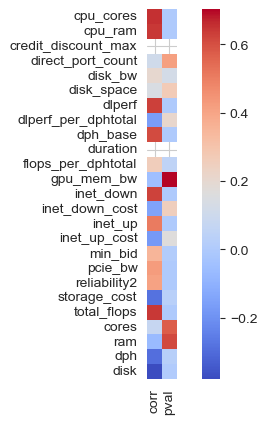

In [17]:
sns.heatmap(corr,
            square=True,
            cmap="coolwarm");

In [18]:
data[cols]

,gpu_name,rented_fraq,cuda_max_good,driver_version,dph,credit_discount_max,dlperf_per_dphtotal,cores,ram,disk,...,reliability2,duration,inet_up,inet_down,pci_gen,hosting_type,pcie_bw,cpu_name,mobo_name,location
machine_id,,,,,,,,,,,,,,,,,,,,,
12630,RTX 4090,[0/1],12.2,535.54.03,0.800,0.00,89.9,88.0,126.0,837.0,...,0.909393,28.0,22.200000,650.200000,3,NaN,11.5,Xeon® E5-2696 v4,X10DRG,"{'country': 'PL', 'location': 'Krakow, Lesser ..."
12618,RTX 4090,[0/4],12.2,535.86.05,1.000,0.00,56.0,12.0,63.0,429.0,...,0.938100,NaN,253.100000,217.000000,4,NaN,21.6,EPYC 7402 24C,MZ32,"{'country': 'JP', 'location': 'Omizo, Fukui', ..."
12296,RTX 4090,[0/8],12.0,525.125.06,0.750,0.10,64.8,16.0,63.0,804.0,...,0.965481,NaN,783.900000,811.800000,4,NaN,21.0,EPYC 7452 32C,ROME2D32GM,"{'country': 'US', 'location': 'River Edge, New..."
12174,RTX 4090,[0/3],12.1,530.41.03,1.000,0.40,66.2,18.0,168.0,1108.0,...,0.966993,79.0,14.800000,52.800000,3,NaN,6.1,Xeon® w7-3465X,Pro WS W790E,"{'country': 'GB', 'lat': 51.4964, 'long': -0.1..."
12139,RTX 4090,[0/1],12.0,525.125.06,0.843,0.00,88.1,64.0,252.0,1480.0,...,0.968387,6.0,219.547007,95.254448,4,NaN,24.3,Ryzen TR 3970X 32C,PRIME TRX40,"{'country': 'JP', 'location': 'Hanawada, Tochi..."
12096,RTX 4090,[0/1],12.0,525.116.04,0.750,0.10,99.0,32.0,126.0,1675.0,...,0.968437,28.0,36.500000,212.600000,4,NaN,25.0,Ryzen 9 5950X 16C,ROG CROSSHAIR VIII DARK HERO,"{'country': 'US', 'location': 'Clermont, Flori..."
11966,RTX 4090,[2/4],12.2,535.86.05,0.796,0.40,69.5,32.0,31.0,1661.0,...,0.982527,3.0,438.400000,286.600000,4,NaN,12.7,EPYC 7B12 64C,ROMED8,"{'country': 'US', 'location': 'Tampa, Florida'..."
11812,RTX 4090,[8/8],12.1,530.41.03,0.710,0.40,65.0,32.0,63.0,46.0,...,0.961880,120.0,107.346281,131.168389,4,NaN,22.5,EPYC 7742 64C,ROME2D32GM,"{'country': 'CA', 'location': 'Edmonton, Alber..."
11808,RTX 4090,[0/1],12.0,525.116.04,0.750,0.10,99.6,32.0,126.0,1659.0,...,0.986874,333.0,38.000000,528.800000,4,NaN,25.0,Ryzen 9 5950X 16C,ROG CROSSHAIR VIII DARK HERO,"{'country': 'US', 'location': 'Clermont, Flori..."


In [19]:
corr.sort_values(by='pval')

,corr,pval
cpu_cores,0.653472,1.512916e-08
cpu_ram,0.643605,2.911895e-08
total_flops,0.642417,3.145626e-08
dlperf,0.627436,8.104033e-08
inet_down,0.624291,9.822234e-08
dph_base,0.608890,2.444622e-07
inet_up,0.507866,3.441166e-05
pcie_bw,0.425538,7.000951e-04
reliability2,0.408053,1.210479e-03
disk,-0.379028,2.822162e-03


Sample size N: 60
True     34
False    26
Name: rented, dtype: int64
SignificanceResult(statistic=0.64244215702514, pvalue=3.140564270831071e-08)


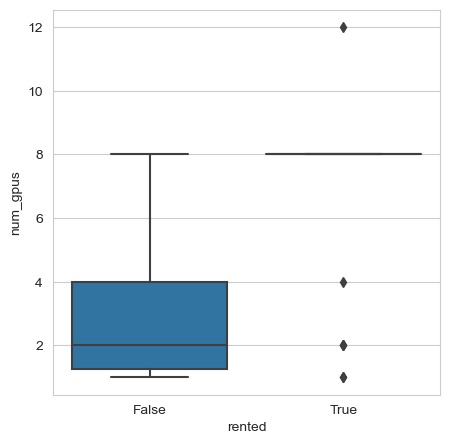

In [20]:
plt.rcParams["figure.figsize"] = (5, 5)
data = offers.query('dph >= 0.6 & gpu_name == "RTX 4090"')

var = 'num_gpus'

print('Sample size N:', len(data))
print(data.rented.value_counts())
print(stats.pointbiserialr(data.rented, data[var]))

# mask = np.abs(stats.zscore(data.inet_up)) < 2
mask = stats.zscore(data[var]) < 2
q_low = data[var].quantile(0.05)
q_high = data[var].quantile(0.95)

mask = data[var].between(0, q_high)

# sns.boxplot(data[mask], x='rented', y=var);
sns.boxplot(data, x='rented', y=var);
# plt.yscale('log')

C:\Users\ergot\AppData\Local\Temp\ipykernel_24080\3320747543.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = pd.DataFrame(offers.query('dph >= 0.8').corr()['rented'])


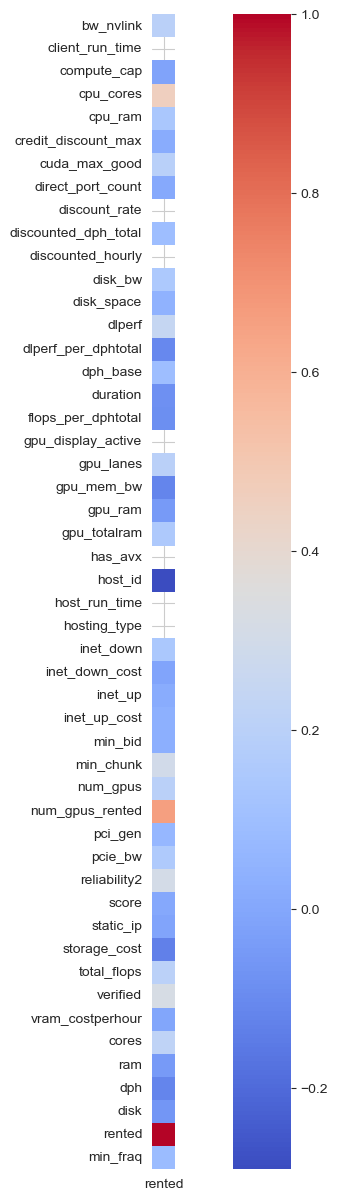

In [21]:
df = pd.DataFrame(offers.query('dph >= 0.8').corr()['rented'])

plt.rcParams["figure.figsize"] = (15, 15)

sns.heatmap(df,
            square=True,
            cmap="coolwarm"
            );

In [22]:
# contingency tables
data = offers.query('dph >= 0.5 & gpu_name == "RTX 4090"')

tab = pd.crosstab(data.rented, data.num_gpus)
tab

num_gpus,1,2,3,4,6,7,8,9,10,12,14
rented,,,,,,,,,,,
False,15,17,4,13,1,6,6,0,0,2,2
True,10,7,1,6,2,0,33,1,1,5,3


In [23]:
data = offers.query('dph >= 0.6 & gpu_name == "RTX 4090"')

print('Sample size N:', len(data))
print(data.rented.value_counts())

corr_cat = pd.DataFrame(index=categorical)
for feat in categorical:
    try:
        # print(feat, data[feat].var())
        tab = pd.crosstab(data.rented, data[feat])
        chi2 = stats.chi2_contingency(tab)
        corr_cat.loc[feat, 'corr'] = chi2.statistic
        corr_cat.loc[feat, 'pval'] = chi2.pvalue
    except Exception as e:
        print(e, feat)

Sample size N: 60
True     34
False    26
Name: rented, dtype: int64
No data; `observed` has size 0. hosting_type


In [24]:
corr_cat

,corr,pval
cpu_name,46.968326,7.094470e-03
disk_name,10.896276,2.076459e-01
gpu_name,0.000000,1.000000e+00
driver_version,32.296919,1.769104e-04
cuda_max_good,0.465417,7.923845e-01
country,37.982199,7.585513e-06
has_avx,0.000000,1.000000e+00
pci_gen,1.579597,2.088188e-01
gpu_display_active,0.000000,1.000000e+00
gpu_lanes,11.221719,3.657923e-03


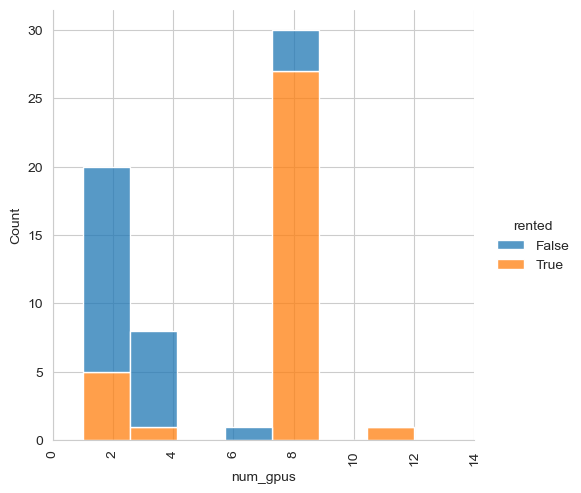

In [25]:
sns.displot(data,
            x='num_gpus',
            # multiple='fill',
            multiple='stack',
            hue='rented').set_xticklabels(rotation=90);

In [26]:
stats.chi2_contingency(tab).statistic, stats.chi2_contingency(tab).pvalue

(0.0, 1.0)

In [27]:
df = offers.query('dph >= 0.8')

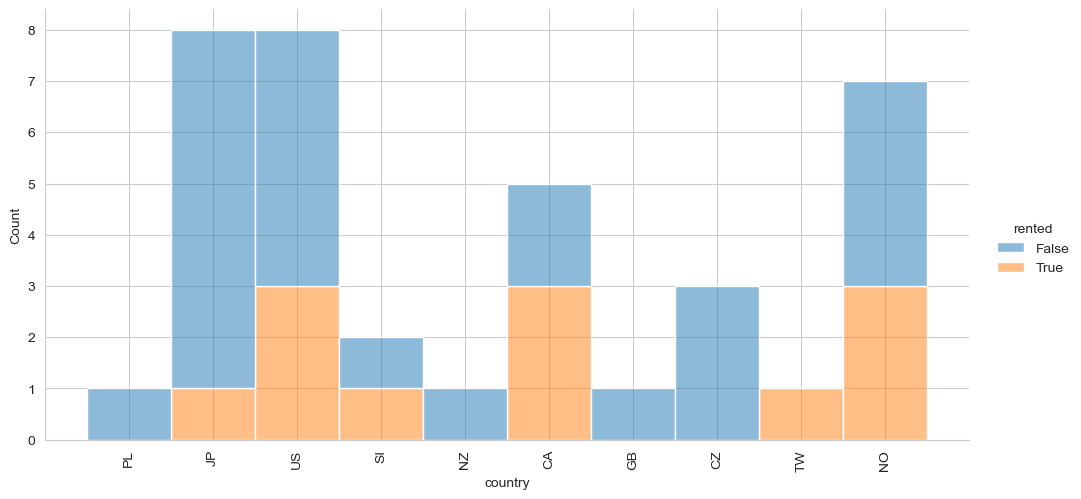

In [28]:
sns.displot(data=df,
            x='country',
            hue='rented',
            # multiple='fill',
            multiple='stack',
            alpha=0.5,
            aspect=2,
            ).set_xticklabels(rotation=90);

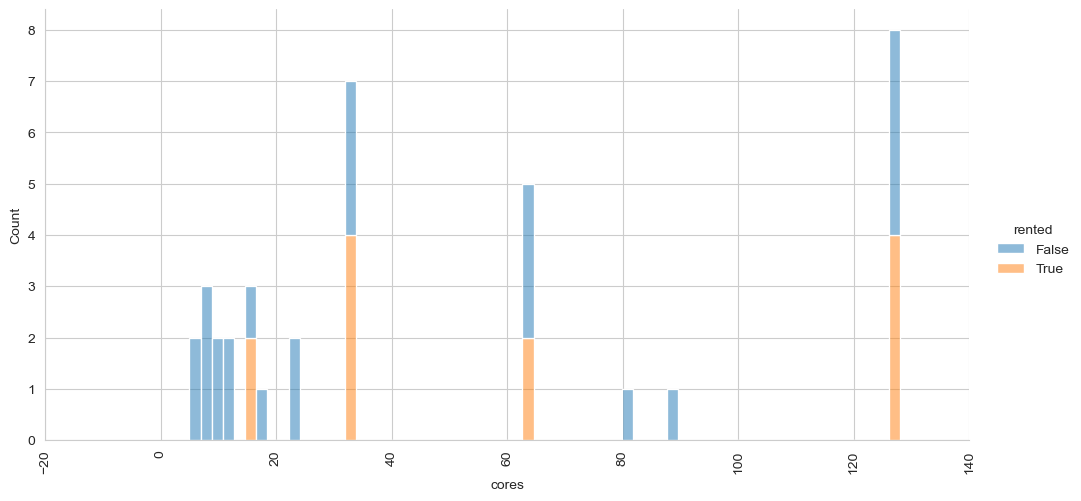

In [29]:
sns.displot(data=df,
            x='cores',
            kind='hist',
            hue='rented',
            # multiple='fill',
            multiple='stack',
            bins=64,
            alpha=0.5,
            aspect=2,
            ).set_xticklabels(rotation=90);

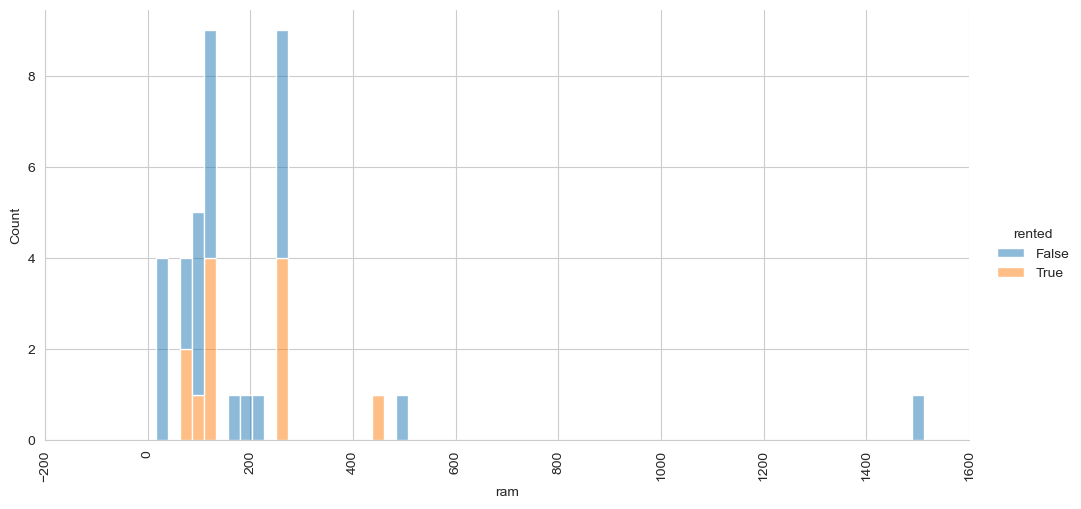

In [30]:
def round_power_two(s: pd.Series):
    return np.log2(df.cpu_ram / 1024).round().astype(int).pow(2)


sns.displot(data=df,
            x='ram',
            kind='hist',
            hue='rented',
            # multiple='fill',
            multiple='stack',
            bins=64,
            alpha=0.5,
            aspect=2,
            ).set_xticklabels(rotation=90);

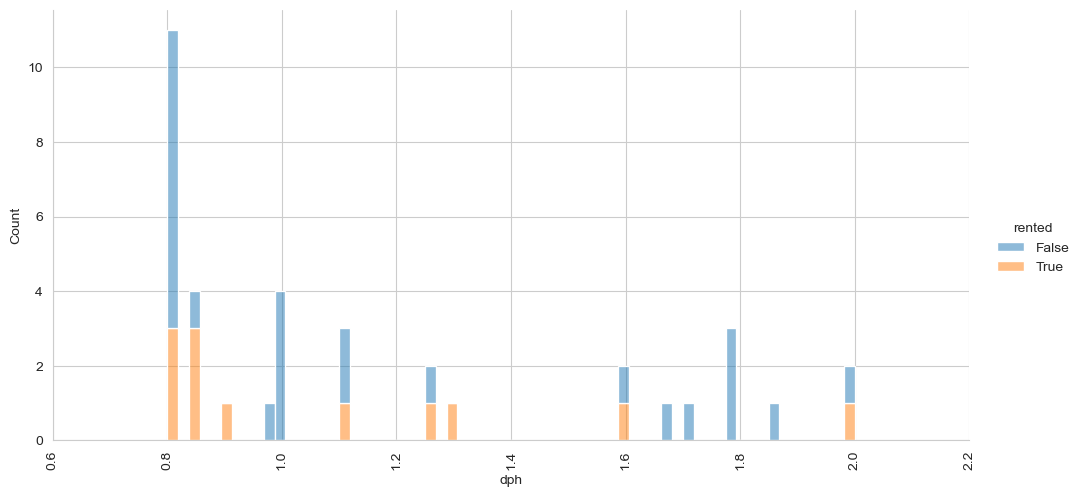

In [31]:
sns.displot(data=df.query('dph > 0.6'),
            x='dph',
            kind='hist',
            hue='rented',
            bins=64,
            multiple='stack',
            # multiple='fill',
            alpha=0.5,
            aspect=2,
            ).set_xticklabels(rotation=90);

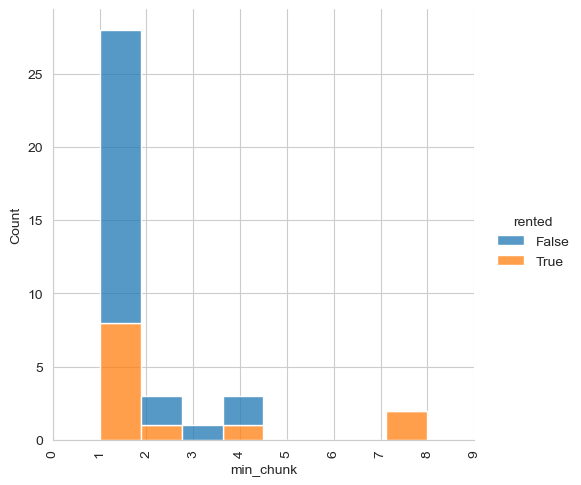

In [32]:
sns.displot(
    df.query('dph > 0.6'),
    x='min_chunk',
    hue='rented',
    multiple='stack',
    bins=8,
).set_xticklabels(rotation=90);

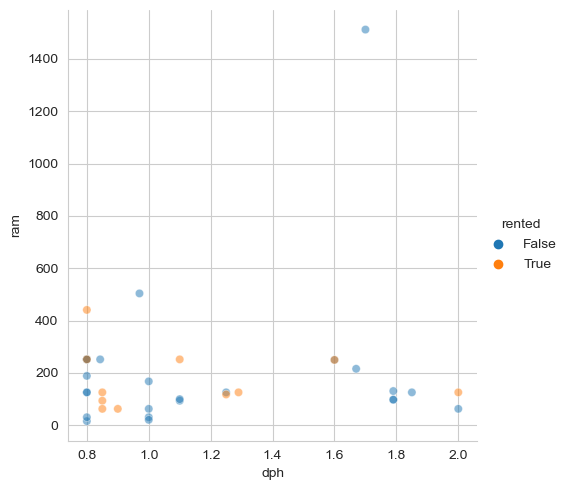

In [33]:
sns.relplot(
    df.query('dph > 0.5'),
    x='dph',
    y='ram',
    hue='rented',
    alpha=0.5
)

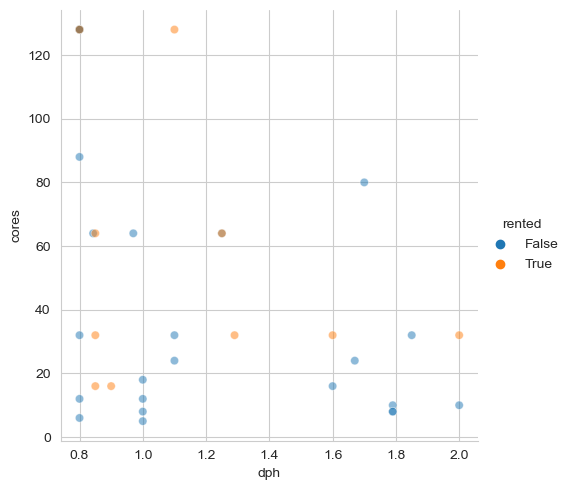

In [34]:
sns.relplot(
    df.query('dph > 0.5'),
    x='dph',
    y='cores',
    hue='rented',
    alpha=0.5
)

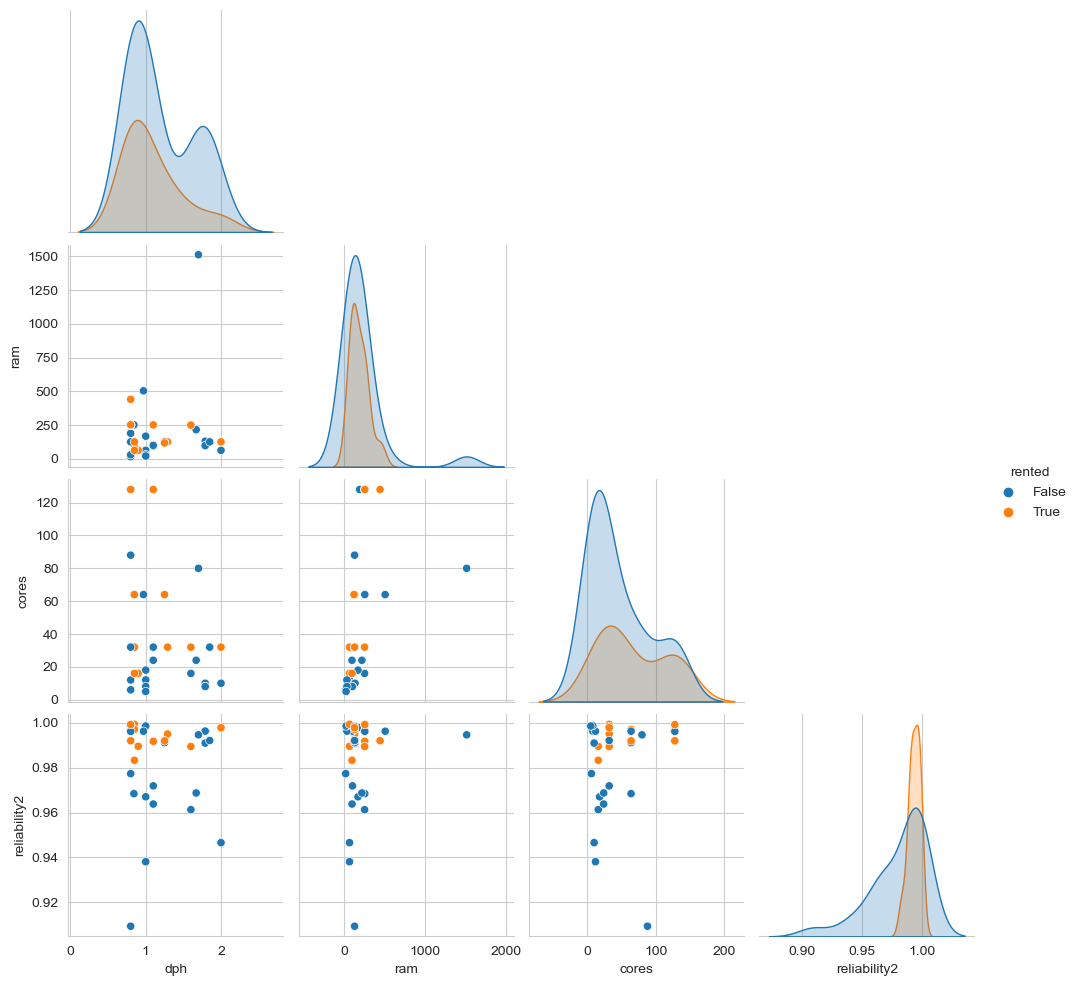

In [35]:
sns.pairplot(
    df.query('dph > 0.6'),
    vars=['dph', 'ram', 'cores', 'reliability2'],
    corner=True,
    hue='rented',
);

In [36]:
sns.catplot(
    df.query('dph < 2'),
    x='cpu',
    y='dph',
    hue='rented',
    aspect=4,
).set_xticklabels(rotation=90);

ValueError: Could not interpret value `cpu` for parameter `x`

In [ ]:
offers['rented'] = offers.num_gpus_rented > 0

sns.relplot(
    offers.query('dph > 0.6 and dph < 2'),
    x='cpu',
    y='dph',
    hue='rented',
    size='num_gpus_rented',
    aspect=2,
    alpha=0.5,
).set_xticklabels(rotation=90);

In [ ]:
sns.relplot(
    offers.query('dph > 0.6 and dph < 2'),
    x='cores',
    y='dph',
    hue='rented',
    size='num_gpus_rented',
    aspect=2,
    alpha=0.5,
).set_xticklabels(rotation=90);

In [ ]:
sns.relplot(
    offers.query('dph > 0.4 and dph < 2 and ram < 1000'),
    x='ram',
    y='dph',
    hue='rented',
    size='num_gpus_rented',
    aspect=1,
    alpha=0.5,
).set_xticklabels(rotation=90);

In [ ]:
sns.relplot(
    offers.query('dph > 0.6 and dph < 2 and ram < 1000'),
    x='dlperf_per_dphtotal',
    y='dph',
    # hue='rented',
    col='rented',
    size='num_gpus_rented',
    aspect=1,
    alpha=0.5,
).set_xticklabels(rotation=90);

In [ ]:
sns.relplot(
    offers.query('dph > 0.4 and dph < 2 and ram < 1000'),
    x='min_fraq',
    y='dph',
    hue='rented',
    size='num_gpus_rented',
    aspect=1,
    alpha=0.5,
).set_xticklabels(rotation=90);

In [ ]:
cols = ['rented_fraq', 'num_gpus_rented','dph', 'dlperf_per_dphtotal', 'cores', 'ram', 'disk', 'disk_bw',
        'min_chunk', 'reliability2', 'start_date','end_date', 'duration', 'inet_up', 'inet_down', 'pci_gen', 'pcie_bw', 'cpu', 'mobo_name', 'country', 'storage_cost', 'location']

offers.query('num_gpus_rented > 0 and dph > 0.6')[cols]

In [ ]:
offers.columns

In [ ]:
# offers.query('dph_per_gpu > 0.6')[cols]
offers.query('num_gpus_rented > 0 and dph >= 0.8')[cols].sort_values(by='dph', ascending=False)

In [ ]:
offers.query('dph >= 0.8')[cols].sort_values(by='dph', ascending=False)